In [17]:

import pandas as pd
import numpy as np
import sqlite3
db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()
df_imdb = pd.read_sql_query('select * from IMDB',db)
df_genre = pd.read_sql_query('select * from genre',db)
df_earning = pd.read_sql_query('select * from earning',db)

res = pd.merge(df_earning,df_imdb, left_on="Movie_id", right_on="Movie_id").iloc[:,:8]
res = res[res["Budget"] != ""]
res["Budget"] = res["Budget"].astype("float64")

ind = res["Budget"].idxmin()
val = res["Budget"].min()

res = res[res["Budget"] == val]

res["Profit"] = res["Domestic"] + res["Worldwide"] - res["Budget"]
res["Profit"].astype("float64")

print(res.loc[res["Profit"].idxmax(),"Title"])


Short Term 12 (2013)


-------------------------------------------------------------------------

In [20]:
import pandas as pd
import numpy as np
import sqlite3
db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()
df_imdb = pd.read_sql_query('select * from IMDB',db)
df_genre = pd.read_sql_query('select * from genre',db)
df_earning = pd.read_sql_query('select * from earning',db)

print(df_earning.columns,df_genre.columns,df_imdb.columns,sep = "\n")

Index(['Movie_id', 'Domestic', 'Worldwide'], dtype='object')
Index(['Movie_id', 'genre'], dtype='object')
Index(['Movie_id', 'Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget',
       'Runtime', 'CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06',
       'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01',
       'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F',
       'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'VotesIMDB', 'Votes1000', 'VotesUS', 'VotesnUS'],
      dtype='object')


In [57]:
# print(df_earning.head(),df_genre.head(),df_imdb.head(),sep = "\n")
df_temp1 = df_imdb.loc[:,["Movie_id","Title"]]
df_temp2 = df_earning

# print(df_temp2.dtypes)

df_temp2.loc[df_temp2["Domestic"] == '', "Domestic"] = 0
df_temp2.loc[df_temp2["Worldwide"] == '', "Worldwide"] = 0

df_temp2["Total"] = df_temp2["Domestic"] + df_temp2["Worldwide"]
df_temp2 = df_temp2.loc[:,["Movie_id","Total"]]

res = pd.merge(df_temp1,df_temp2,left_on = "Movie_id", right_on = "Movie_id")
res["Year"] = res["Title"].str[-5:-1]
res["Year"] = res["Year"].astype("int32")

res = res.loc[res.groupby("Year")["Total"].idxmax(),["Year","Title"]]
yr = res["Year"]
title = res["Title"]

i = 0

for ele in yr:
    print(ele, title.iloc[i])
    i+=1

# print(res.head())


2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


---------------

In [133]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()
df_imdb = pd.read_sql_query('select * from IMDB',db)
df_genre = pd.read_sql_query('select * from genre',db)
df_earning = pd.read_sql_query('select * from earning',db)

print(df_earning.columns,df_genre.columns,df_imdb.columns,sep = "\n")

Index(['Movie_id', 'Domestic', 'Worldwide'], dtype='object')
Index(['Movie_id', 'genre'], dtype='object')
Index(['Movie_id', 'Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget',
       'Runtime', 'CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06',
       'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01',
       'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F',
       'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'VotesIMDB', 'Votes1000', 'VotesUS', 'VotesnUS'],
      dtype='object')


Adventure 25.10
Action 17.98
Drama 10.85
Sci-Fi 10.77
Animation 7.66
Comedy 7.22
Fantasy 4.54
Thriller 3.99
Biography 2.59
Mystery 1.95
Family 1.91
Crime 1.77
Romance 1.12
History 0.72
Western 0.57
Sport 0.46
War 0.36
Musical 0.25
Music 0.15
Horror 0.03


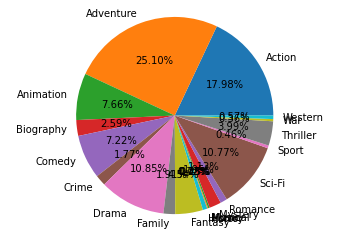

In [222]:
df_temp1 = df_genre
df_temp2 = df_imdb.loc[:,["Movie_id","Budget"]]
df_temp2.loc[df_temp2["Budget"]=="","Budget"] = 0

df_temp2.Budget = df_temp2.Budget.astype("float64")

df_temp1 = df_temp1[df_temp1["genre"] != '']

res = pd.merge(df_temp1,df_temp2,left_on = "Movie_id", right_on = "Movie_id")
res = res.groupby("genre")["Budget"].sum()

lab = res.index
total = res.sum()

p,t,pct = plt.pie(res ,labels = lab, autopct="%.2f%%")
plt.axis("equal")

res = res.sort_values(ascending=False)
for ele in res.index:
    print("{} {:.2f}".format(ele,res[ele]*100/total))
plt.show()


----

In [196]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()
df_imdb = pd.read_sql_query('select * from IMDB',db)
df_genre = pd.read_sql_query('select * from genre',db)
df_earning = pd.read_sql_query('select * from earning',db)

print(df_earning.columns,df_genre.columns,df_imdb.columns,sep = "\n")

Index(['Movie_id', 'Domestic', 'Worldwide'], dtype='object')
Index(['Movie_id', 'genre'], dtype='object')
Index(['Movie_id', 'Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget',
       'Runtime', 'CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06',
       'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01',
       'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F',
       'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'VotesIMDB', 'Votes1000', 'VotesUS', 'VotesnUS'],
      dtype='object')


In [223]:
df_temp1 = df_genre
df_temp2 = df_earning.loc[:,["Movie_id","Domestic","Worldwide"]]

df_temp2.loc[df_temp2["Domestic"]=="","Domestic"] = 0
df_temp2.loc[df_temp2["Worldwide"]=="","Worldwide"] = 0

df_temp2["Total"] = df_temp2["Domestic"] + df_temp2["Worldwide"]

df_temp1 = df_temp1[df_temp1["genre"] != '']

res = pd.merge(df_temp1,df_temp2,left_on = "Movie_id", right_on = "Movie_id")

res = res.groupby("genre")["Total"].sum()
total = res.sum()
s=0
res = res.sort_values(ascending = False)
for ele in res.index:
    print("{} {:.2f}".format(ele,res[ele]*100/total))


Adventure 23.57
Action 17.91
Drama 11.96
Sci-Fi 9.95
Comedy 7.69
Animation 6.77
Fantasy 5.15
Thriller 4.42
Biography 3.42
Mystery 2.01
Crime 1.55
Romance 1.45
Family 1.05
History 1.04
Western 0.65
Music 0.43
Musical 0.38
Sport 0.32
War 0.25
Horror 0.01


-----

In [253]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()
df_imdb = pd.read_sql_query('select * from IMDB',db)
df_genre = pd.read_sql_query('select * from genre',db)
df_earning = pd.read_sql_query('select * from earning',db)

print(df_earning.columns,df_genre.columns,df_imdb.columns,sep = "\n")

Index(['Movie_id', 'Domestic', 'Worldwide'], dtype='object')
Index(['Movie_id', 'genre'], dtype='object')
Index(['Movie_id', 'Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget',
       'Runtime', 'CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06',
       'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01',
       'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F',
       'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'VotesIMDB', 'Votes1000', 'VotesUS', 'VotesnUS'],
      dtype='object')


In [259]:
df_temp1 = df_genre
df_temp2 = df_imdb.loc[:,["Movie_id","Title","Rating"]]


df_temp1 = df_temp1[(df_temp1["genre"] == "Mystery") | (df_temp1["genre"] == "Sci-Fi")]

df_temp1["genre"].unique()

df_new = df_temp1.groupby("Movie_id").count()
df_new = df_new[df_new["genre"] == 2]

# print(df_new["genre"])

df_ans = pd.merge(df_new,df_temp2,left_on="Movie_id", right_on="Movie_id")
df_ans = df_ans[df_ans["Rating"]>=8]
for ele in df_ans["Title"]:
    print(ele)

Arrival (2016)


---

---